<a href="https://colab.research.google.com/github/cdixson-ds/DS-Unit-1-Build/blob/master/IMDB_more_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

Load each dataset from IMDb

In [0]:
import pandas as pd

In [0]:
df_basic = pd.read_csv('https://datasets.imdbws.com/title.basics.tsv.gz', sep='\t', na_values=[r'\N','\\N'], low_memory=False)

In [0]:
df_rating = pd.read_csv('https://datasets.imdbws.com/title.ratings.tsv.gz', sep='\t', na_values=[r'\N','\\N'], low_memory=False)

In [0]:
#df_crew = pd.read_csv('https://datasets.imdbws.com/title.crew.tsv.gz', sep='\t', na_values=[r'\N','\\N'], low_memory=False)

In [0]:
df_princ = pd.read_csv('https://datasets.imdbws.com/title.principals.tsv.gz', sep='\t', na_values=[r'\N','\\N'], low_memory=False)

In [0]:
df_akas = pd.read_csv('https://datasets.imdbws.com/title.akas.tsv.gz', sep='\t', na_values=[r'\N','\\N'], low_memory=False)

In [0]:
print('df_basic shape: ', df_basic.shape),
print('df_rating shape: ', df_rating.shape),
#print('df_crew shape: ', df_crew.shape),
print('df_princ shape: ', df_princ.shape)

df_basic shape:  (6521410, 9)
df_rating shape:  (1021688, 3)
df_princ shape:  (37699185, 6)


Wrangel each dataframe separately

In [0]:
def wrangleBasic(df):
  df['tconst'] = df['tconst'].astype(str)
  df['tconst'] = df['tconst'].str.strip('tt')  #strip tt off movie id
  df['tconst'] = df['tconst'].astype(int)  #convert tconst to int
  df = df[~df['titleType'].isin(['short', 'tvShort', 'videoGame', 'tvSpecial',
                                 'tvMiniSeries', 'tvMovie', 'tvSeries', 'video',
                                 'short', 'tvEpisode'])]  #remove tv titles
  #df = df.drop(columns=['originalTitle', 'isAdult', 'originalTitle','primaryTitle', 'runtimeMinutes', 'endYear', 'titleType']) #remove columns
  df = df.drop(columns=['originalTitle', 'primaryTitle', 'endYear', 'titleType']) #remove less columns to explore feature importance
  df = df.dropna()  #drop nans
  df['startYear'] = df['startYear'].astype(int) #convert startYear to int
  df['runtimeMinutes'] = df['runtimeMinutes'].astype(int) #convert startYear to int
  df['genres'] = df['genres'].str.lower() #convert genres to lower case

  drama = df['genres'].str.contains('drama')    #collapse genres into single categories
  comedy = df['genres'].str.contains('comedy')
  documentary = df['genres'].str.contains('documentary')
  romance = df['genres'].str.contains('romance')
  family = df['genres'].str.contains('family')
  animation = df['genres'].str.contains('animation')
  crime = df['genres'].str.contains('crime')
  action = df['genres'].str.contains('action')
  adventure = df['genres'].str.contains('adventure')
  mystery = df['genres'].str.contains('mystery')
  musical = df['genres'].str.contains('musical')
  thriller = df['genres'].str.contains('thriller')
  horror = df['genres'].str.contains('horror')
  sci_fi = df['genres'].str.contains('sci')
  fantasy = df['genres'].str.contains('fantasy')
  war = df['genres'].str.contains('war')
  western = df['genres'].str.contains('western')
  film_noir = df['genres'].str.contains('film')
  mystery = df['genres'].str.contains('mystery')
  history = df['genres'].str.contains('history')
  sport = df['genres'].str.contains('sport')
  biography = df['genres'].str.contains('biography')

  df.loc[drama, 'genres'] = 'drama'
  df.loc[comedy, 'genres'] = 'comedy'
  df.loc[documentary, 'genres'] = 'documentary'
  df.loc[romance, 'genres'] = 'romance'
  df.loc[family, 'genres'] = 'family'
  df.loc[animation, 'genres'] = 'animation'
  df.loc[crime, 'genres'] = 'crime'
  df.loc[action, 'genres'] = 'action'
  df.loc[adventure, 'genres'] = 'adventure'
  df.loc[mystery, 'genres'] = 'mystery'
  df.loc[thriller, 'genres'] = 'thriller'
  df.loc[horror, 'genres'] = 'horror'
  df.loc[sci_fi, 'genres']  ='sci_fi'
  df.loc[fantasy, 'genres']  ='fantasy'
  df.loc[war, 'genres']  ='war'
  df.loc[western, 'genres']  ='western'
  df.loc[film_noir, 'genres'] ='film_noir'
  df.loc[mystery, 'genres'] ='mystery'
  df.loc[history, 'genres'] ='history'
  df.loc[sport, 'genres'] ='sport'
  df.loc[biography, 'genres'] ='biography'

  df = df[~df['genres'].isin(['music,reality-tv''reality-tv,talk-show', 
                                              'news,talk-show',
                                              'news,talk-show',
                                              'adult,music',
                                              'music,talk-show',
                                              'news,reality-tv,talk-show',
                                              'game-show,music',
                                              'adult,short',
                                              'music,musical',
                                              'adult,musical',
                                              'music,musical,reality-tv',
                                              'musical,reality-tv',
                                              'short',
                                              'reality-tv,talk-show',
                                              'news',
                                              'talk-show',
                                              'reality-tv',
                                              'game-show',
                                              '\\n',
                                              'music,reality-tv',
                                              'music'
                                              ])]
    
  df = df[df['startYear'] > 1950]
  df = df[df['isAdult'] == 0]
  df = df.drop(columns=['isAdult'])

  df = df.reset_index(drop=True)

  return df

In [0]:
df_basic = wrangleBasic(df_basic)

In [0]:
df_basic.head()

,tconst,startYear,runtimeMinutes,genres
0,15724,1993,102,mystery
1,16906,2014,80,comedy
2,22064,1951,100,drama
3,23331,1983,50,documentary
4,25557,1951,87,drama


In [0]:
df_basic.dtypes

tconst             int32
startYear          int32
runtimeMinutes     int32
genres            object
dtype: object

In [0]:
df_basic.shape

(279702, 4)

In [0]:
def wrangleRating(df):

  #df = df.drop(columns=['numVotes']) #remove columns
  df['tconst'] = df['tconst'].astype(str)
  df['tconst'] = df['tconst'].str.strip('tt')  #strip tt off movie id
  df['tconst'] = df['tconst'].astype(int)  #convert tconst to int

  df = df.dropna()  #drop nans

  #engineer a new feature which multiplies the number of votes by average rating
  #pop = df_rating['averageRating'] * df_rating['numVotes']
  #df = pd.concat([df, pop], axis=1)
  #df.columns = ['tconst', 'averageRating', 'numVotes', 'popVote']

  #df = df.reset_index(drop=True)
    
  #df = df[df['averageRating'] > 7]

  #convert averageRating into a categorical feature
  df['averageRating'] = df['averageRating'].astype(str)
  df['averageRating'] = df['averageRating'].astype('category')

  return df

In [0]:
df_rating = wrangleRating(df_rating)

In [0]:
df_rating.head()

,tconst,averageRating,numVotes
11,12,7.4,9605
13,14,7.1,4204
58,60,7.8,60
189,211,7.5,3122
218,271,7.3,6


In [0]:
df_rating.shape

(516073, 3)

In [0]:
#def wrangleCrew(df):
#  df = df.copy()

#  df = df.dropna()  #drop nans
  
#  df['tconst'] = df['tconst'].astype(str)
#  df['tconst'] = df['tconst'].str.strip('tt')  #strip tt off movie id
#  df['tconst'] = df['tconst'].astype(int)  #convert tconst to int
    
#  df = df.drop(columns=['writers'])
    
#  return df


In [0]:
#df_crew = wrangleCrew(df_crew)

In [0]:
#df_crew.head()

In [0]:
#df_crew.tail()

In [0]:
df_princ.head()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,NaN,"[""Herself""]"
1,tt0000001,2,nm0005690,director,NaN,NaN
2,tt0000001,3,nm0374658,cinematographer,director of photography,NaN
3,tt0000002,1,nm0721526,director,NaN,NaN
4,tt0000002,2,nm1335271,composer,NaN,NaN


In [0]:
def wranglePrinc(df):
  df = df.copy()
  df['tconst'] = df['tconst'].astype(str)
  df['tconst'] = df['tconst'].str.strip('tt')  #strip tt off movie id
  df['tconst'] = df['tconst'].astype(int)  #convert tconst to int

  df = df.drop(columns=['ordering', 'category', 'job', 'characters']) #remove less columns to explore feature importance
  df = df.dropna()  #drop nans
  return df

In [0]:
df_princ = wranglePrinc(df_princ)

In [0]:
df_princ.head()

,tconst,nconst
0,1,nm1588970
1,1,nm0005690
2,1,nm0374658
3,2,nm0721526
4,2,nm1335271


In [0]:
df_akas.head()

,tconst,region
3,1,US
11,2,US
27,5,US
30,5,US
31,5,US


In [0]:
 def wrangleAkas(df):
    df = df.copy()
    df = df.drop(columns=['ordering', 'title', 'language', 'types', 'attributes', 'isOriginalTitle'])
    df = df.dropna()  #drop nans
    df = df[df['region'].str.contains('US')]
    
    df['titleId'] = df['titleId'].astype(str)
    df['titleId'] = df['titleId'].str.strip('tt')  #strip tt off movie id
    df['titleId'] = df['titleId'].astype(int)  #convert tconst to int
    
    df.columns = ['tconst','region']
                
    return df

In [0]:
df_akas = wrangleAkas(df_akas)

Merge dataframes

In [0]:
df_imdb = pd.merge(df_basic, df_rating, on='tconst')

In [0]:
df_imdb.head()

,tconst,startYear,runtimeMinutes,genres,averageRating,numVotes
0,25557,1951,87,drama,7.1,29
1,31458,1970,86,comedy,7.1,8
2,37483,1951,99,drama,7.4,18
3,38089,1954,87,war,7.2,40
4,42215,1951,85,romance,7.5,58


In [0]:
df_imdb.shape

(49977, 6)

In [0]:
df_imdb = pd.merge(df_imdb, df_akas, on='tconst')

In [0]:
df_imdb.head()

,tconst,startYear,runtimeMinutes,genres,averageRating,numVotes,region
0,42354,1951,99,mystery,7.2,184,US
1,42354,1951,99,mystery,7.2,184,US
2,42429,1951,88,comedy,7.1,407,US
3,42619,1951,115,drama,8.0,8843,US
4,42900,1951,81,thriller,7.1,35,US


In [0]:
df_imdb.shape

(22492, 7)

In [0]:
df_imdb = pd.merge(df_imdb, df_princ, on='tconst')

In [0]:
df_imdb.head()

,tconst,startYear,runtimeMinutes,genres,averageRating,numVotes,region,nconst
0,42354,1951,99,mystery,7.2,184,US,nm0743100
1,42354,1951,99,mystery,7.2,184,US,nm0885203
2,42354,1951,99,mystery,7.2,184,US,nm0603761
3,42354,1951,99,mystery,7.2,184,US,nm0192490
4,42354,1951,99,mystery,7.2,184,US,nm0274671


In [0]:
df_imdb.shape

(193165, 8)

In [0]:
df_imdb.isnull().sum()

tconst            0
startYear         0
runtimeMinutes    0
genres            0
averageRating     0
numVotes          0
region            0
nconst            0
dtype: int64

In [0]:
df_imdb['nconst'].value_counts()

nm0002354    80
nm0001553    59
nm0000229    57
nm0000636    55
nm0441526    53
             ..
nm1009007     1
nm4458811     1
nm0609662     1
nm2320164     1
nm0780915     1
Name: nconst, Length: 117873, dtype: int64

In [0]:
#df_imdb = pd.merge(df_imdb, df_crew, on='tconst')

In [0]:
#df_imdb.head()

In [0]:
#delete region column now that df is sorted

df_imdb = df_imdb.drop(columns=['region'])

In [0]:
df_imdb.head()

,tconst,startYear,runtimeMinutes,genres,averageRating,numVotes,nconst
0,42354,1951,99,mystery,7.2,184,nm0743100
1,42354,1951,99,mystery,7.2,184,nm0885203
2,42354,1951,99,mystery,7.2,184,nm0603761
3,42354,1951,99,mystery,7.2,184,nm0192490
4,42354,1951,99,mystery,7.2,184,nm0274671


In [0]:
df_imdb.shape

(193165, 7)

Feature Importance 

In [0]:
target = 'averageRating'
features = df_imdb.columns.drop('averageRating')

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

#target needs to be test df

X = df_imdb[features]
Y = df_imdb[target]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [0]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

In [0]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
    )

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.9942731420066652


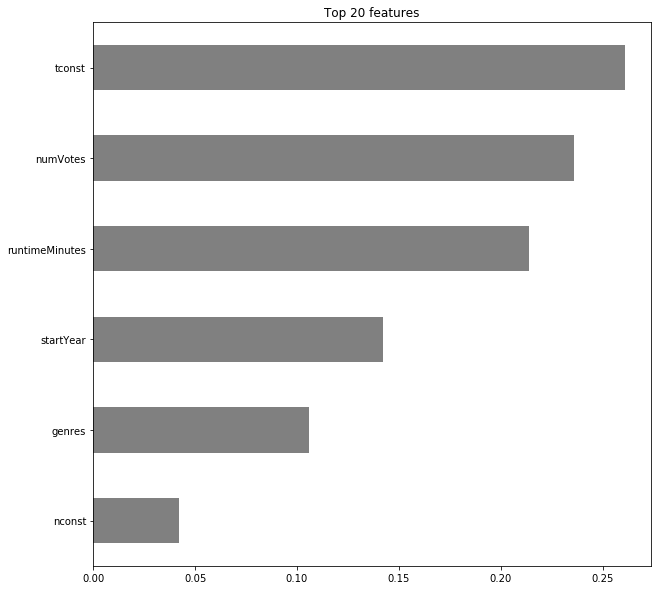

In [0]:
# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

In [0]:
#Need to make ratings a categorical variable to fit an xgboost model
#import category_encoders as ce
#from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)

In [0]:
from sklearn.metrics import accuracy_score
y_pred = pipeline.predict(X_train)
print('Validation Accuracy', accuracy_score(y_train, y_pred))

Split by genre 

In [0]:
df_drama = df_imdb[df_imdb['genres'].str.contains('drama')]

In [0]:
df_drama.head()

,tconst,startYear,runtimeMinutes,genres,averageRating,numVotes,nconst
30,42619,1951,115,drama,8.0,8843,nm0493508
31,42619,1951,115,drama,8.0,8843,nm0480564
32,42619,1951,115,drama,8.0,8843,nm0729635
33,42619,1951,115,drama,8.0,8843,nm0346653
34,42619,1951,115,drama,8.0,8843,nm0000975


In [0]:
target_d = 'averageRating'
features_d = df_drama.columns.drop('averageRating')

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

#target needs to be test df

X = df_drama[features_d]
Y = df_drama[target_d]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [0]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

In [0]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
    )

# Fit on train, score on val
pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.9950506186726659


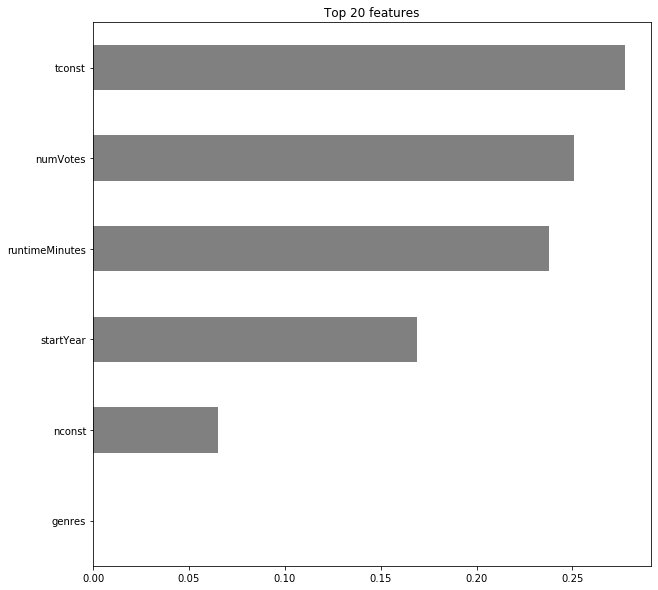

In [0]:
# Get feature importances
rf = pipeline.named_steps['randomforestclassifier']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

Look into actors??

In [0]:
df_princ['nconst'].value_counts()